### **Colorado Graph Simulation**

This Jupyter notebook will demonstrate how to extract all nodes and edges from the Colorado county.csv dataset, along with visualizing toy models using networkx (nx).

In [28]:
# tested on python 3.11.2
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import re

### **Finding Nodes and Edges**

Prior to representing a graph, we will access all nodes and edges from our Colorado dataset. Each node represents a county in Colorado, and edges exist between any two contiguous counties in Colorado.

### **Finding Nodes**

The `find_nodes` function will select all distinct county names from the CSV.

In [19]:
"""
find_nodes function
Input:  Filepath (string) that leads to county.csv
Output: List containing all of Colorado's counties sorted in alphabetical order
"""
def find_nodes(input_path: str):
    
    """
    Use a hashset to track all of Colorado's counties w/out duplicates
    Hashsets have O(1) average lookup time.
    """
    seen = set()
    
    with open(input_path, "r") as input_file:
        
        # skip the header
        # if you don't do this, then you'll insert "County" as a node
        next(input_file, None)
        
        for line in input_file:
            try:
                
                """
                For each row, add each county (that's first listed) into
                the hashset. Since each pair [a, b] has a pair [b, a] in
                the CSV, we don't need to add both column values for each row.
                """
                row = line.split(",")
                seen.add(row[0])                
            
            # if something broke, print what went wrong
            except Exception as e:
                print(str(e))
    
    """
    Return a list in sorted order.
    Nodes and counties will be considered the same thing.
    """
    nodes = list(seen)
    nodes.sort()
    
    # O(nlogn) time for sorting counties, where n = number of counties
    # O(n) extra space for hashset and list
    return nodes

# run the function
# make sure that county.csv is in the SAME folder as this notebook!
input_path = "county.csv"
nodes = find_nodes(input_path)

Check if Colorado has 64 counties. If it doesn't, something went wrong!<br>
Source: https://dola.colorado.gov/lgis/counties.jsf


In [20]:
len(nodes)

64

Check to see if the counties are in sorted order.

In [22]:
nodes[:10]

['Adams',
 'Alamosa',
 'Arapahoe',
 'Archuleta',
 'Baca',
 'Bent',
 'Boulder',
 'Broomfield',
 'Chaffee',
 'Cheyenne']

### **Assigning Numbers to County Names**

Now that we've found all of Colorado's counties, let's assign key-value pairs.

- Key: County name
- Value: Position in alphabetically sorted list

In [53]:
# create a hashmap to assign counties to numbers
nums = dict()

# assign a number to each node
for i, county_name in enumerate(nodes):
    nums[county_name] = i

### **Finding Edges**

The `find_edges` function will generate an adjacency list of the edges in the graph, where edges represent contiguity.

In [38]:
"""
find_edges function
Input:  Filepath (string) that leads to county.csv
Output: Adjacency list containing all of Colorado's edges (as hashmap/dict)
"""
def find_edges(input_path: str):
    
    """
    Create an adjacency list, represented as a hashmap/dict
    Key:   County name (type: string)
    Value: List of county names (type: List[str])
    """
    adj_list = dict()
    
    with open(input_path, "r") as input_file:
        
        # skip the header
        next(input_file, None)
        
        for line in input_file:
            try:
                
                """
                For each row, we can get values [a, b]. Add a as a key if it
                doesn't already exist. Then, add b to the adjacency list.
                """
                line = re.sub('[\n]', '', line)
                a, b = line.split(",")
                if a not in adj_list:
                    adj_list[a] = []
                adj_list[a].append(b)               
            
            # if something broke, print what went wrong
            except Exception as e:
                print(str(e))
    
    # return the adjancency list
    # O(n) time for traversing CSV, where n = number of counties
    # O(n) extra space for adjacency list
    return adj_list

# run the function
# make sure that county.csv is in the SAME folder as this notebook!
input_path = "county.csv"
adj_list = find_edges(input_path)

Let's verify if the adjacency list looks good. Here, we'll display all of El Paso County's neighboring counties.

In [39]:
adj_list["El Paso"]

['Crowley', 'Douglas', 'Elbert', 'Fremont', 'Lincoln', 'Pueblo', 'Teller']

### **Extracting Edges**

Now that we have the adjacency list of the graph, let's extract all edges from the graph.

In [41]:
# store all the edges in a list
# stores (int, int) tuples
edges = []
for key in adj_list:
    
    # find the target county
    a = nums[key]
    
    # create an edge for every one of its neighbors
    for neighbor in adj_list[key]:
        b = nums[neighbor]
        edges.append((a, b))

Let's check how the edges look. The number of edges should equal the number of lines in the CSV (excluding the header and empty lines). In other words, there should be 330 edges.

In [44]:
len(edges)

330

In [43]:
edges[-5:]

[(62, 44), (63, 32), (63, 38), (63, 48), (63, 61)]

### **Creating the Graph**

We'll create a graph with 64 nodes, with each county being represented as a node. Now, with our list of edges, we will add them all into the graph.

In [76]:
graph = nx.Graph()

Add the nodes, along with their names as attributes.

In [77]:
for i, county_name in enumerate(nodes):
    graph.add_nodes_from([(i, {"name": county_name})])

Now, add edges to the graph.

In [78]:
graph.add_edges_from(edges)

Let's test the algorithm by partitioning the graph into three districts.

In [81]:
# Partition the graph into three subgraphs
subgraph1_nodes = list(range(0, 21))
subgraph2_nodes = list(range(21, 43))
subgraph3_nodes = list(range(43, 64))

subgraph1 = graph.subgraph(subgraph1_nodes)
subgraph2 = graph.subgraph(subgraph2_nodes)
subgraph3 = graph.subgraph(subgraph3_nodes)

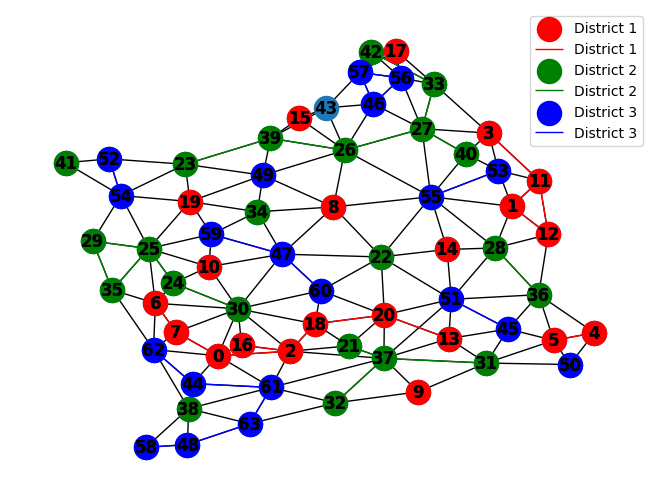

In [83]:
pos = nx.spring_layout(graph)  # You can change the layout algorithm as needed

nx.draw(graph, pos, with_labels=True, font_weight='bold')

nx.draw(subgraph1, pos, with_labels=True, font_weight='bold', node_color='r', edge_color='r', label='District 1')
nx.draw(subgraph2, pos, with_labels=True, font_weight='bold', node_color='g', edge_color='g', label='District 2')
nx.draw(subgraph3, pos, with_labels=True, font_weight='bold', node_color='b', edge_color='b', label='District 3')


plt.legend()
plt.show()